In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# dataformat.txt 출력해 확인

with open('dataformat.txt', 'r') as f:
    print(f.read())
    

lat:   latitude of the oxts-unit (deg)
lon:   longitude of the oxts-unit (deg)
alt:   altitude of the oxts-unit (m)
roll:  roll angle (rad),    0 = level, positive = left side up,      range: -pi   .. +pi
pitch: pitch angle (rad),   0 = level, positive = front down,        range: -pi/2 .. +pi/2
yaw:   heading (rad),       0 = east,  positive = counter clockwise, range: -pi   .. +pi
vn:    velocity towards north (m/s)
ve:    velocity towards east (m/s)
vf:    forward velocity, i.e. parallel to earth-surface (m/s)
vl:    leftward velocity, i.e. parallel to earth-surface (m/s)
vu:    upward velocity, i.e. perpendicular to earth-surface (m/s)
ax:    acceleration in x, i.e. in direction of vehicle front (m/s^2)
ay:    acceleration in y, i.e. in direction of vehicle left (m/s^2)
ay:    acceleration in z, i.e. in direction of vehicle top (m/s^2)
af:    forward acceleration (m/s^2)
al:    leftward acceleration (m/s^2)
au:    upward acceleration (m/s^2)
wx:    angular rate around x (rad/s)
wy: 

In [10]:
import os
def read_txt_files(directory):
    data = []
    for file in os.listdir(directory):
        if file.endswith('.txt'):
            with open(os.path.join(directory, file), 'r') as f:
                content = f.readlines()
                content = [line.strip().split() for line in content]
                data.append((file.split('.')[0], content))
    return data

# 데이터 읽기
directory = 'data'
data = read_txt_files(directory)

# 빈 데이터프레임 생성
df = pd.DataFrame()

# 각 파일의 데이터를 데이터프레임으로 변환 후 병합
for filename, content in data:
    temp_df = pd.DataFrame(content)
    temp_df['filename'] = filename
    df = pd.concat([df, temp_df], axis=0, ignore_index=True)

# 열 이름 설정
df.columns = ['lat', 'lon', 'alt', 'roll', 'pitch', 'yaw', 'vn', 've', 'vf', 'vl', 'vu', 'ax', 'ay', 'az', 'af', 'al', 'au', 'wx', 'wy', 'wz', 'wf', 'wl', 'wu', 'pos_accuracy', 'vel_accuracy', 'navstat', 'numsats', 'posmode', 'velmode', 'orimode', 'filename']

df

,lat,lon,alt,roll,pitch,yaw,vn,ve,vf,vl,...,wl,wu,pos_accuracy,vel_accuracy,navstat,numsats,posmode,velmode,orimode,filename
0,49.015003823272,8.4342971002335,116.43032836914,0.035752,0.00903,-2.6087069803847,-6.811441479104,-11.275641809511,13.172716663769,-0.12475264293164,...,-0.022495299354602,-0.018809330937153,0.027658633371879,0.012727922061358,4,11,6,6,6,0000000000
1,49.014997147797,8.4342801643975,116.43227386475,0.036453,0.008009,-2.6110049803847,-6.7699157701468,-11.25071862282,13.129879921905,-0.1296124234787,...,-0.012614277251239,-0.021891250950339,0.027658633371879,0.012727922061358,4,11,6,6,6,0000000001
2,49.014991107977,8.4342648138193,116.43529510498,0.035908,0.006461,-2.6133139803847,-6.7315187822835,-11.221558050195,13.084994068263,-0.1403968162132,...,-0.016039362066511,-0.023275588099693,0.027658633371879,0.012727922061358,4,11,6,6,6,0000000002
3,49.014985128444,8.4342494910691,116.44071960449,0.035565,0.005031,-2.6159039803847,-6.68493309545,-11.198742882657,13.041455256294,-0.14449702620615,...,-0.013816663306394,-0.024773318553328,0.027658633371879,0.012727922061358,4,11,6,6,6,0000000003
4,49.01497858597,8.4342326764083,116.44785308838,0.034299,0.00647,-2.6188039803847,-6.6342093744852,-11.175294520933,12.995313202002,-0.14861568956766,...,0.011585957218563,-0.026827028489992,0.027658633371879,0.012727922061358,4,11,6,6,6,0000000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,49.01460323606,8.4329972465759,116.45911407471,0.03758,0.01988,-2.7539889803847,-1.9798179626038,-4.8547094566207,5.2428883884175,0.0019954016312242,...,0.0061522757625149,-0.00061520140100618,0.028425340807104,0.012727922061358,4,11,6,6,6,0000000103
104,49.014601506969,8.4329908037984,116.45667266846,0.04249,0.021188,-2.7537099803847,-1.9094034569261,-4.7188905461086,5.0905285980388,0.016330864453471,...,0.010460687422683,0.0023511653080065,0.028425340807104,0.012727922061358,4,11,6,6,6,0000000104
105,49.01459964219,8.4329839644024,116.45390319824,0.04341,0.020753,-2.7533579803847,-1.8769324545275,-4.5413897033202,4.9139377209489,-0.018810153135391,...,-0.0024592491851595,0.0018875524464531,0.028425340807104,0.012727922061358,4,11,6,6,6,0000000105
106,49.014597970014,8.4329779872669,116.45146942139,0.039574,0.019496,-2.7532079803847,-1.8553971300673,-4.3837224160024,4.759856471224,-0.057585019483487,...,-0.010795294595124,0.001809644886184,0.028425340807104,0.012727922061358,4,11,6,6,6,0000000106


In [11]:
import folium

# 위도, 경도를 이용해 지도에 표시하기

m_list = []

for i in range(len(df)):
    m_list.append([float(df['lat'][i]), float(df['lon'][i])])
    
m = folium.Map(location=[m_list[0][0], m_list[0][1]], zoom_start=15)

for i in range(len(m_list)):
    folium.Marker(m_list[i], popup=f'lat: {m_list[i][0]}, lon: {m_list[i][1]}').add_to(m)
    
m.save('map.html')
m

In [12]:
import utm

# utm 모듈을 이용해 위도, 경도를 utm 좌표로 변환하기

utm_list = []

for i in range(len(df)):
    utm_coords = utm.from_latlon(float(df['lat'][i]), float(df['lon'][i]))
    easting, northing, zone_number, zone_letter = utm_coords
    altitude = float(df['alt'][i])
    utm_list.append([easting, northing, altitude])    
    
utm_list

[[458635.58464276, 5429277.839115199, 116.43032836914],
 [458634.3407622153, 5429277.106267534, 116.43227386475],
 [458633.21332222654, 5429276.443218593, 116.43529510498],
 [458632.0879667101, 5429275.786856501, 116.44071960449],
 [458630.85305579484, 5429275.068728598, 116.44785308838],
 [458629.7328244417, 5429274.422690582, 116.45391845703],
 [458628.6164203951, 5429273.783633034, 116.45693969727],
 [458627.50385690737, 5429273.151890808, 116.45882415771],
 [458626.2843742487, 5429272.466646772, 116.46192169189],
 [458625.1812014733, 5429271.848335377, 116.46768188477],
 [458623.9727312162, 5429271.178583905, 116.47554779053],
 [458622.8798159818, 5429270.579008284, 116.47978210449],
 [458621.79354497715, 5429269.98899451, 116.48006439209],
 [458620.7140205169, 5429269.40770359, 116.47911834717],
 [458619.5348347269, 5429268.778865094, 116.4803237915],
 [458618.4688575025, 5429268.214784802, 116.48098754883],
 [458617.3001679544, 5429267.601755511, 116.48131561279],
 [458616.240239

Text(0.5, 0, 'Altitude')

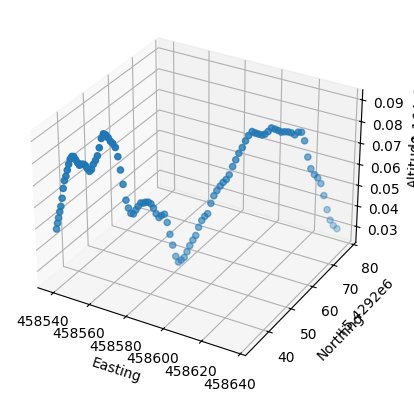

In [13]:
# 3d plot으로 utm 좌표를 시각화하기

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([utm_list[i][0] for i in range(len(utm_list))], [utm_list[i][1] for i in range(len(utm_list))], [utm_list[i][2] for i in range(len(utm_list))])

ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Altitude')



In [18]:
# JupyterDash를 사용하여 앱을 정의

import plotly.graph_objs as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash

utm_list = []
for i in range(len(df)):
    utm_coords = utm.from_latlon(float(df['lat'][i]), float(df['lon'][i]))
    easting, northing, zone_number, zone_letter = utm_coords
    easting_km = easting / 1000.0
    northing_km = northing / 1000.0
    altitude = float(df['alt'][i])
    utm_list.append([easting_km, northing_km, altitude])

app = dash.Dash(__name__)

frames = []

app.layout = html.Div([
    dcc.Graph(
        id='3d-scatter-plot',
        figure={
            'data': [
                go.Scatter3d(
                    x=[utm_list[i][0] for i in range(len(utm_list))],
                    y=[utm_list[i][1] for i in range(len(utm_list))],
                    z=[utm_list[i][2] for i in range(len(utm_list))],
                    mode='markers+lines',
                    name='GPS',
                    marker=dict(size=4, color='blue')
                ),
            ],
            'layout': go.Layout(
                title='3D Visualization of GPS and Kalman Filtered Data',
                scene=dict(
                    xaxis_title='X (km)',
                    yaxis_title='Y (km)',
                    zaxis_title='Z (m)',
                    aspectmode='manual',
                    aspectratio=dict(x=1, y=1, z=0.01)  # x, y, z 비율을 동일하게 설정
                ),
                margin=dict(l=0, r=0, b=0, t=50),
                height=800,
                width=1000,
                updatemenus=[{
                    'type': 'buttons',
                    'showactive': False,
                    'buttons': [{
                        'label': 'Play',
                        'method': 'animate',
                        'args': [None, {
                            'frame': {'duration': 100, 'redraw': True},
                            'fromcurrent': True
                        }]
                    }]
                }]
            ),
            'frames': frames
        }
    )
])


# Jupyter Notebook에서 실행할 때는 JupyterDash의 run_server 메서드 사용
app.run_server(debug=True, mode='inline', use_reloader=False)